In [2]:
# EDA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# For Database Connection
import pymysql
from pymysql.err import OperationalError

import os
from dotenv import load_dotenv

In [3]:
# Download Data from kaggle
!kaggle datasets download -d laotse/credit-risk-dataset

Dataset URL: https://www.kaggle.com/datasets/laotse/credit-risk-dataset
License(s): CC0-1.0
100%|█████████████████████████████████████████| 368k/368k [00:00<00:00, 422kB/s]
100%|█████████████████████████████████████████| 368k/368k [00:00<00:00, 421kB/s]


In [4]:
# Unzip the downloaded data
!unzip credit-risk-dataset.zip

Archive:  credit-risk-dataset.zip
  inflating: credit_risk_dataset.csv  


In [3]:
# Import data as pandas df
data = pd.read_csv('credit_risk_dataset.csv')

In [6]:
data.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [7]:
data.tail()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26
32580,66,42000,RENT,2.0,MEDICAL,B,6475,9.99,0,0.15,N,30


In [8]:
data.isna().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [9]:
data.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


In [13]:
data.describe(include='object').T

,count,unique,top,freq
person_home_ownership,32581,4,RENT,16446
loan_intent,32581,6,EDUCATION,6453
loan_grade,32581,7,A,10777
cb_person_default_on_file,32581,2,N,26836


In [4]:
# Check and handle duplicate values
data.duplicated().value_counts() # Total 165 duplicate values
data.drop_duplicates(inplace=True)

In [5]:
# Check Missing Values
print(data.isna().sum())
print("________Missing in Percentage_________")
round(data.isna().sum()/data.shape[0] * 100,2)


person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              887
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3095
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64
________Missing in Percentage_________


person_age                    0.00
person_income                 0.00
person_home_ownership         0.00
person_emp_length             2.74
loan_intent                   0.00
loan_grade                    0.00
loan_amnt                     0.00
loan_int_rate                 9.55
loan_status                   0.00
loan_percent_income           0.00
cb_person_default_on_file     0.00
cb_person_cred_hist_length    0.00
dtype: float64

In [6]:
# Handle the missing values
# loan  interest rate vary bank to bank , so we can fill with average interest
data['loan_int_rate'].fillna(data['loan_int_rate'].median(),inplace=True)

# For person emp length missing values are for a very number of rows , so we can drop those
data.dropna(inplace=True)

In [7]:
data.isna().sum()

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

### Now as we handle missing datas let's load these to database

In [68]:
# Check database connection

load_dotenv()
host= os.environ.get("HOST")
user = os.environ.get("USERNAME")
password = os.environ.get("PASSWORD")
database = os.environ.get("DATABASE")


mydb = None

try:
    mydb = pymysql.connect(
        host=host,
        user=user,
        password=password
    )

    print("Successfully connected to the database")

except OperationalError as e:
    print("Error while connecting to MySQL", e)

finally:
    if mydb:
        mydb.close()
        print("MySQL connection is closed")

Successfully connected to the database
MySQL connection is closed


In [60]:
# Mapping DataFrame dtypes to MySql data types
dtype_mapping = {
    'int64': 'INT',
    'float64':'DECIMAL(10,2)',
    'object':'VARCHAR(255)',  # Default to VARCHAR for string types
    'datetime64[ns]':'DATETIME',
    'bool':'BOOLEAN'
}

def get_mysql_dtype(pandas_dtype):
    return dtype_mapping.get(str(pandas_dtype),'VARCHAR(255)')

def sanitize_col_name (col_name):
    # Replace spaces with underscores and ensure it starts with a letter
    sanitize_name = col_name.replace(' ', '_').replace('$','_').replace('-','_')
    if not sanitize_name[0].isalpha():
        sanitize_name = 'col_' + sanitize_name
    return sanitize_name

def get_columns_definitions(df):
    columns =[]

    for col, dtype in df.dtypes.items():
        mySql_dtype = get_mysql_dtype(dtype)
        sanitized_col = sanitize_col_name(col)
        columns.append(f"`{sanitized_col}` {mySql_dtype}")
    return ','.join(columns)




In [61]:
get_columns_definitions(data)

'`person_age` INT,`person_income` INT,`person_home_ownership` VARCHAR(255),`person_emp_length` DECIMAL(10,2),`loan_intent` VARCHAR(255),`loan_grade` VARCHAR(255),`loan_amnt` INT,`loan_int_rate` DECIMAL(10,2),`loan_status` INT,`loan_percent_income` DECIMAL(10,2),`cb_person_default_on_file` VARCHAR(255),`cb_person_cred_hist_length` INT'

In [62]:
# Create a function to Create Table query 
def create_table_query(table_name , df):
    column_definitions = get_columns_definitions(df)
    query = f"""
            CREATE TABLE {table_name} (
            {column_definitions});
            """
    return query

In [65]:
create_table_query('credit_risk', data)

'\n            CREATE TABLE credit_risk (\n            `person_age` INT,`person_income` INT,`person_home_ownership` VARCHAR(255),`person_emp_length` DECIMAL(10,2),`loan_intent` VARCHAR(255),`loan_grade` VARCHAR(255),`loan_amnt` INT,`loan_int_rate` DECIMAL(10,2),`loan_status` INT,`loan_percent_income` DECIMAL(10,2),`cb_person_default_on_file` VARCHAR(255),`cb_person_cred_hist_length` INT);\n            '

### Create table from Data Frame

In [72]:
def create_table_from_dataframe(host, user ,password ,database, table_name, df):
    connection = None

    try:
        # Connect to MySql server
        connection = pymysql.connect(
            host = host,
            user = user,
            password = password,
            database= database
        )
        cursor = connection.cursor()
        
        # Generate the Create table statement 
        create_table_statement = create_table_query(table_name, df)

        # Execute the Create table statement
        cursor.execute(create_table_statement)
        print(f"Table '{table_name}' Created Successfully")

    except pymysql.MySQLError as e:
        print(f"Error: {e}")

    finally:
        if connection:
            cursor.close()
            connection.close()
            print("MySql connection is closed")

In [73]:
create_table_from_dataframe(host=host,user=user, password=password ,database=database,table_name='credit_risk_data',df=data)

Table 'credit_risk_data' Created Successfully
MySql connection is closed


### Now insert data to newly created DB Table

In [81]:


def insert_data_from_dataframe(host, user, password, database, table_name, df):
    connection  = None
    df = df
    try:
        # Connect to the MySQL server
        connection = pymysql.connect(
            host=host,
            user=user,
            password=password,
            database=database
        )
        cursor = connection.cursor()

        # Replace NAN values with None
        # df = replace_nan_values(df)

        # Prepare the INSERT statement

    # Loop through the DataFrame's column names and types
        columns = [sanitize_col_name(col) for col in df.columns]
        column_names = ', '.join(f"`{col}`" for col in columns)
        placeholders = ', '.join(['%s'] * len(columns))
        insert_stmt = f"INSERT INTO {table_name} ({column_names}) VALUES ({placeholders})"

        # Prepare data
        data = [tuple(row) for row in df.to_records(index=False)]

        # Execute the INSERT statement
        cursor.executemany(insert_stmt, data)
        connection.commit()
        print(f"Inserted {cursor.rowcount} rows into '{table_name}'")

    except pymysql.MySQLError as e:
        print(f"Error: {e}")

    finally:
        if connection:
            cursor.close()
            connection.close()
            print("MySQL connection is closed")



In [82]:
insert_data_from_dataframe(host=host,user=user, password=password ,database=database,table_name='credit_risk_data',df=data)

Inserted 31529 rows into 'credit_risk_data'
MySQL connection is closed


### Fetch data from DB

In [83]:

connection = pymysql.connect(
            host=host,
            user=user,
            password=password,
            database=database
        )
cursor = connection.cursor()

In [89]:
query = f"select * from {database}.credit_risk_data"
df_mysql = pd.read_sql(query, connection)


/var/folders/1q/97slxf2n6bv2jwc9z0pm2jch0000gn/T/ipykernel_1826/1085828183.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_mysql = pd.read_sql(query, connection)


In [90]:
df_mysql

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
31524,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
31525,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
31526,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
31527,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


### Exploring data distribution

In [8]:
# there are persons who are older than 85 years - as the rule person can not get credit after 85 years 
# delete all persons older 85 years
data =data[data["person_age"]<=85] 

In [9]:
# People with employment > 60 years will be deleted.
data =data[data["person_emp_length"] <= 60]

                       count  in Percentage
person_home_ownership                      
RENT                   16006          50.78
MORTGAGE               13018          41.30
OWN                     2391           7.59
OTHER                    106           0.34




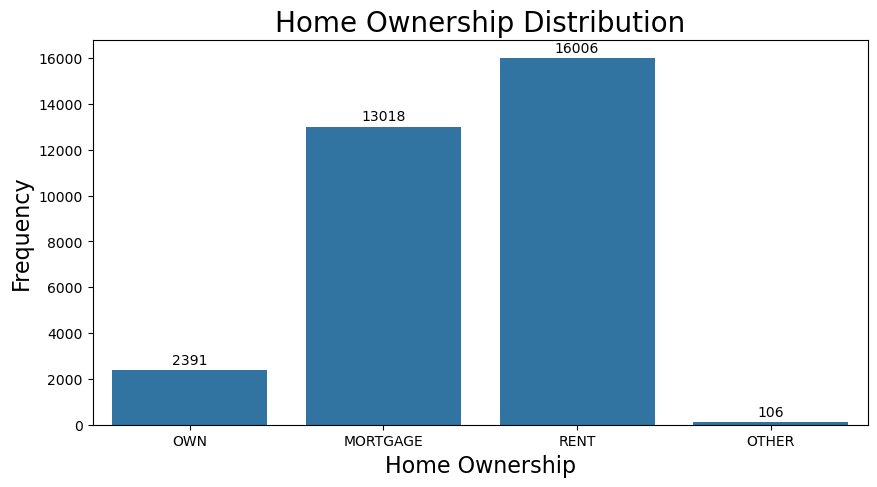



                   count  in Percentage
loan_intent                            
EDUCATION           6246          19.82
MEDICAL             5868          18.62
VENTURE             5518          17.51
PERSONAL            5346          16.96
DEBTCONSOLIDATION   5044          16.00
HOMEIMPROVEMENT     3499          11.10




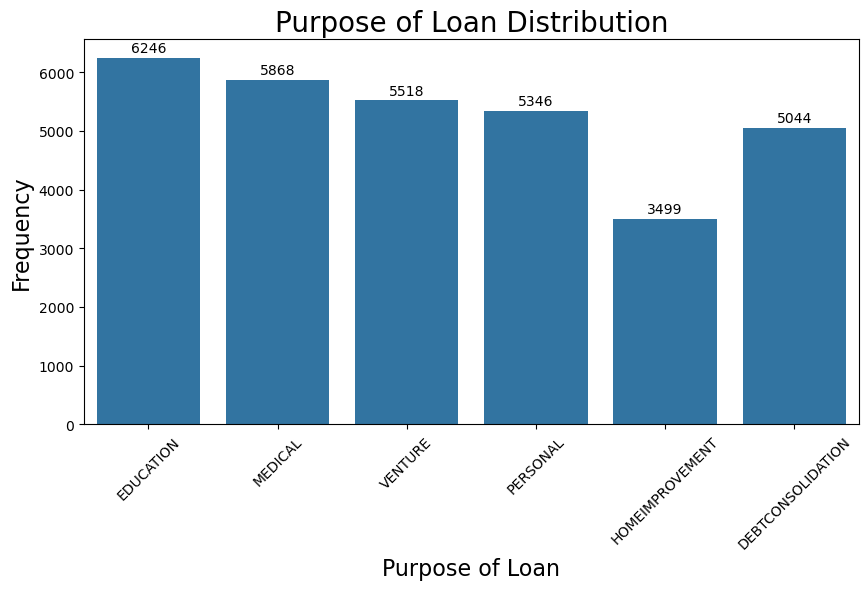



            count  in Percentage
loan_grade                      
A           10300          32.68
B           10121          32.11
C            6300          19.99
D            3549          11.26
E             951           3.02
F             236           0.75
G              64           0.20




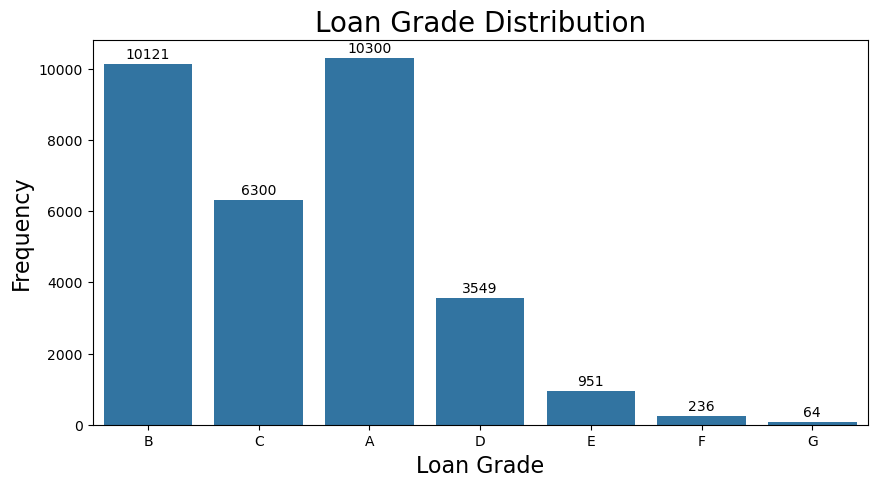



                           count  in Percentage
cb_person_default_on_file                      
N                          25907          82.19
Y                           5614          17.81




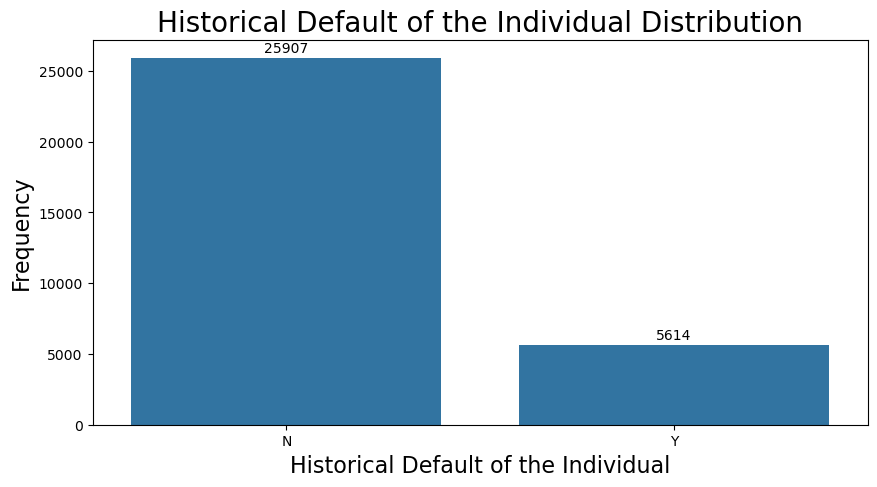

In [103]:
# Exploring Categorical features
cat_features = data.select_dtypes(include=['object'])
cat_x_labels = ["Home Ownership", "Purpose of Loan", "Loan Grade", "Historical Default of the Individual"]
cat_title =  ["Home Ownership Distribution", "Purpose of Loan Distribution", "Loan Grade Distribution", "Historical Default of the Individual Distribution"]

for i, k in enumerate(cat_features):
    feature = data[k].value_counts().reset_index().sort_values(by='count', ascending=False)
    feature['in Percentage'] = round(feature['count']/data.shape[0] *100, 2)
    print(feature.set_index(k))
    print('\n') 
    fig, ax = plt.subplots(figsize = (10,5))
    sns.countplot(x=k,data=data,ax=ax)
    ax.bar_label(ax.containers[0],padding=2,color='black',fontsize=10)
    ax.set_xlabel(cat_x_labels[i],fontsize =16)
    ax.set_ylabel("Frequency", fontsize= 16)
    ax.set_title(cat_title[i],fontsize = 20)
    if i ==1 :
        ax.tick_params(axis='x',rotation = 45)
    plt.show()
    print('\n')


### Observations:

* Most people who takes credit has a rent house (50.78 %) or have mortage(41.30 %)
* Most common loan is for EDUCATION(19.82%) , where as least common is for HOMEIMPROVEMENT (11.10%)
* The majority of loans have a grade of A or B (~32%), which may indicate that these are the most favorable or desirable loan options. Loans with grades E, F, or G (<3%) may be considered riskier or less desirable.
* Majority of the individuals are not defaulter ( 82.19%) , where some of the individuls fall under defaulter list(17.81%).

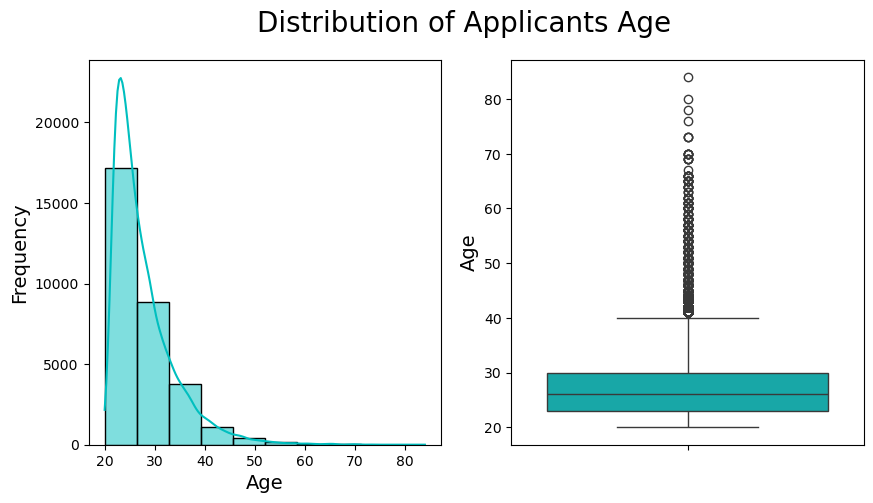

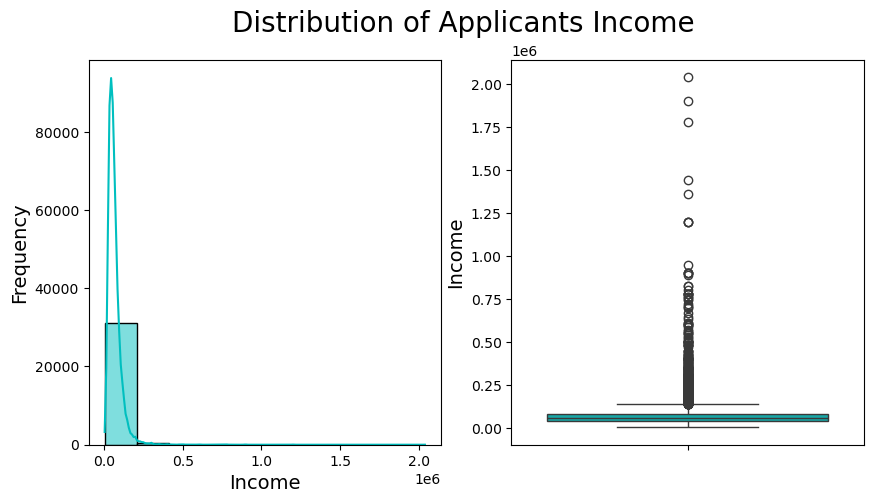

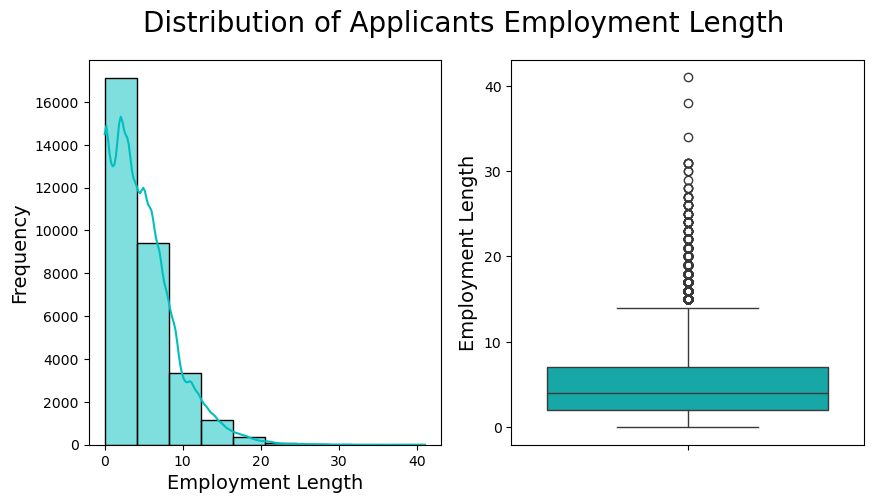

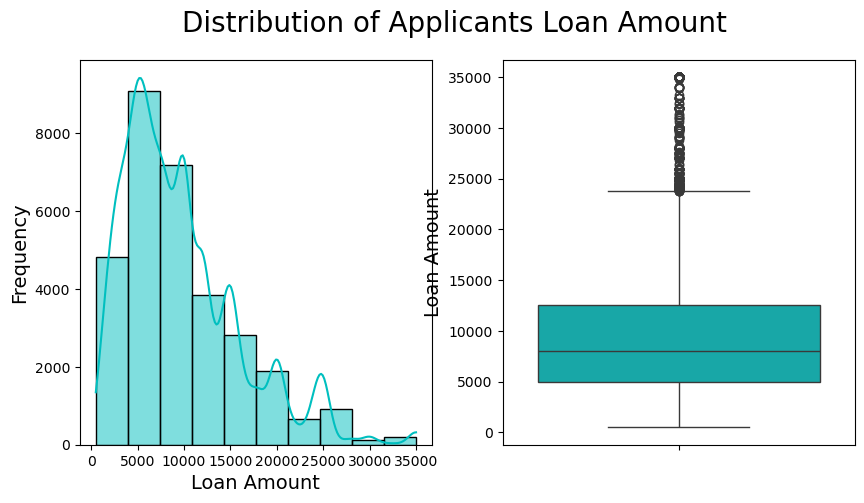

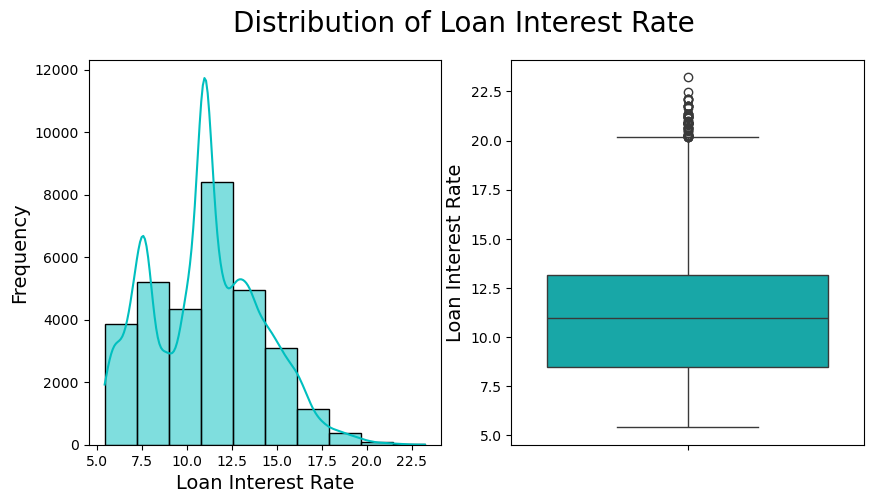

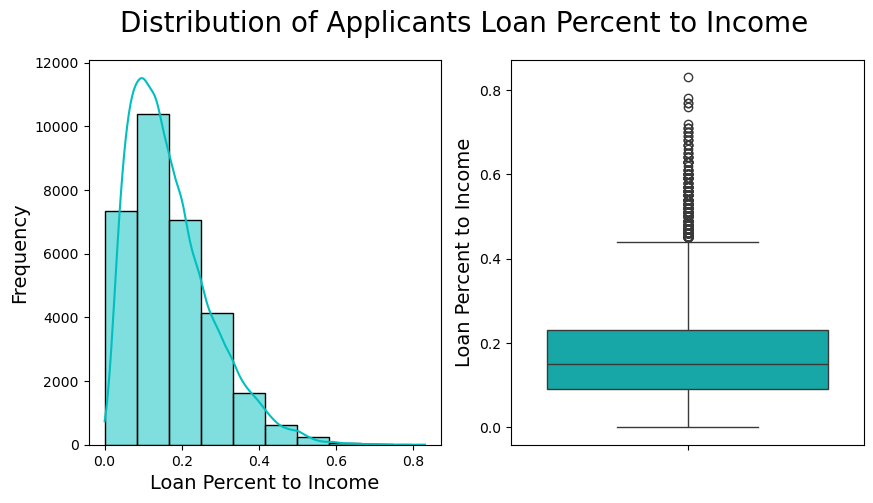

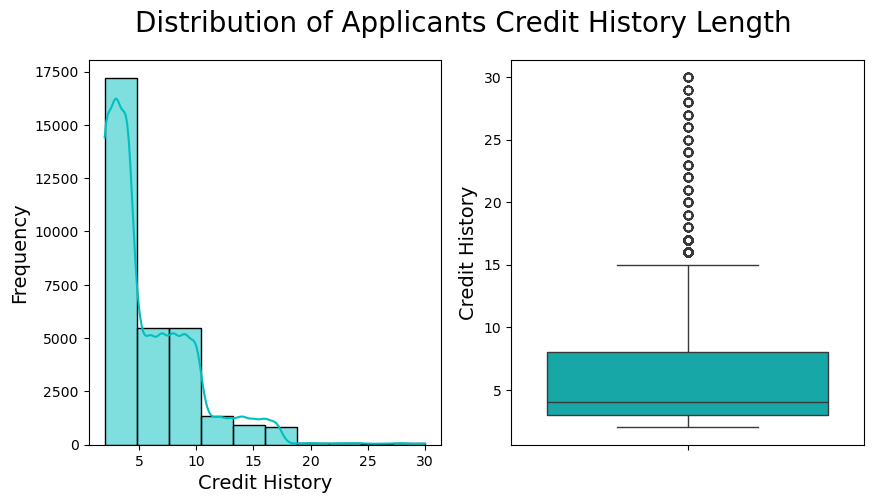

In [108]:
# Exploring Numerical Features
df_num_features = data.select_dtypes(include=['float64', 'int64']).drop("loan_status", axis = 1)
num_features = df_num_features.columns
num_x_labels=["Age","Income","Employment Length", "Loan Amount", "Loan Interest Rate", "Loan Percent to Income","Credit History"]
num_titles=["Distribution of Applicants Age", "Distribution of Applicants Income","Distribution of Applicants Employment Length","Distribution of Applicants Loan Amount", "Distribution of Loan Interest Rate","Distribution of Applicants Loan Percent to Income", "Distribution of Applicants Credit History Length"]

for i, k in enumerate(num_features):
        fig, axs = plt.subplots(1,2,figsize=(10,5))
        plt.suptitle(num_titles[i], fontsize =20)
        
        sns.histplot(x= k, data = data, kde = True, color = "c", bins = 10, ax =axs[0])
        axs[0].set_xlabel(num_x_labels[i],fontsize =14)
        axs[0].set_ylabel('Frequency',fontsize =14)
        
        sns.boxplot(y= k, data = data, color ="c", ax =axs[1])
        axs[1].set_ylabel(num_x_labels[i], fontsize =14)
        
        plt.subplots_adjust(wspace=0.2, hspace=0.8)
        plt.show()

### Observations:
* Most of the credit borrowers are 20-30 years old with low income and employment length. 
* Credit history less than 10 years. The most popular loan amount ist 5.000-10.000$ with interest rates ranging from 7-13%.


All distribution are right skewed with long tail and have lots of outliers. It can lead to biased estimates of summary statistics and can affect the performance of the statistical models and the validity of assumptions in certain statistical tests and models.


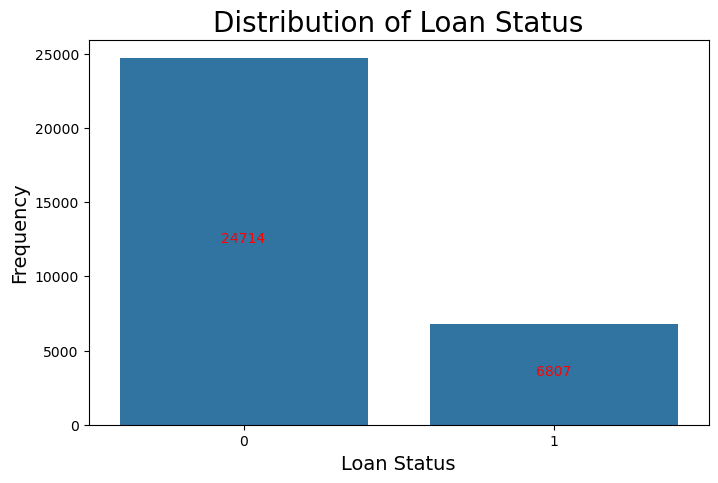

Non Default : 78.4
Default : 21.6


In [17]:
# Distribution of Target Column

fig ,ax = plt.subplots(figsize=(8,5))
ax = sns.countplot(x= 'loan_status',data=data)
ax.set_xlabel('Loan Status',fontsize=14)
ax.set_ylabel('Frequency',fontsize=14)
ax.bar_label(ax.containers[0],padding=2 , color ='red',label_type='center',fontsize=10)
ax.set_title("Distribution of Loan Status", fontsize=20)
plt.show()

print("Non Default :", round(data['loan_status'].value_counts()[0]/len(data)*100,2))
print("Default :", round(data['loan_status'].value_counts()[1]/len(data)*100,2))

### Observation:

* The majority of borrowers in the dataset (78.4%) have successfully paid back their loans without defaulting, while 21.6% have defaulted on their loans.

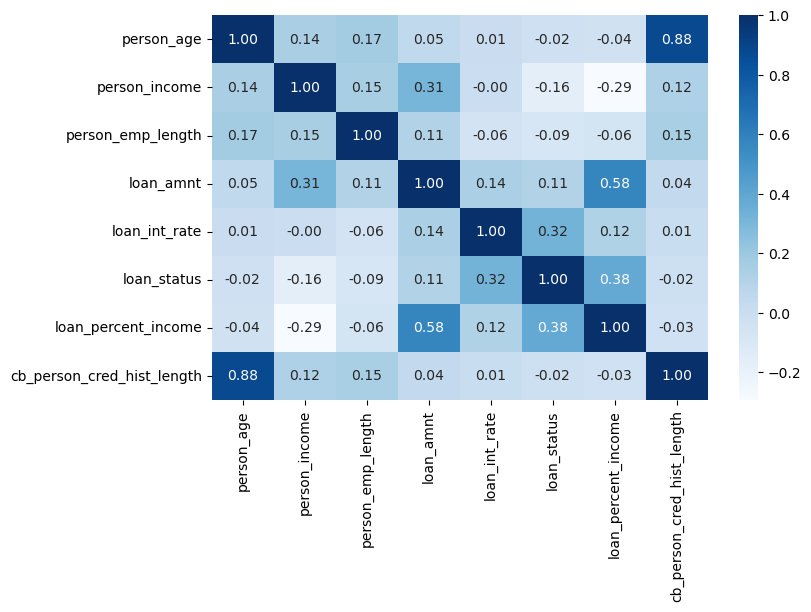

In [21]:
# Correlation analysis
num_df = data.select_dtypes(include=['float64','int64'])
corr = num_df.corr()
fig = plt.figure(figsize=(8,5))
sns.heatmap(corr, annot=True, cmap='Blues', fmt='.2f')
plt.show()

### Observation:

* Person_age and person_cred_hist_length has a strong correlation (~88%), as expected. Older people tend to have longer credit histories, which is a natural consequence of aging.
* Loan_person_income and loan_amount has a moderate correlation (~58%). As the loan amount increases, the proportion of income committed to the loan tends to increase, that is also expected.
* Person_income and loan_amount: The relationship between income and loan amount is positive (week correlation ~31%), meaning that people with higher incomes tend to borrow more. This is also expected, because individuals with higher incomes have more financial resources to repay debt.
* Negative effect on loan_status have person_income, person_emp_length, person_age and credit history. These variables have a positive impact on loan quality, making it less likely for borrowers with higher values of these variables to default on their loans.

* Positive effect on loan_status have loan_percent_income, loan_int_rate, and loan_amnt. It means, that as they increase, the risk of default increases.

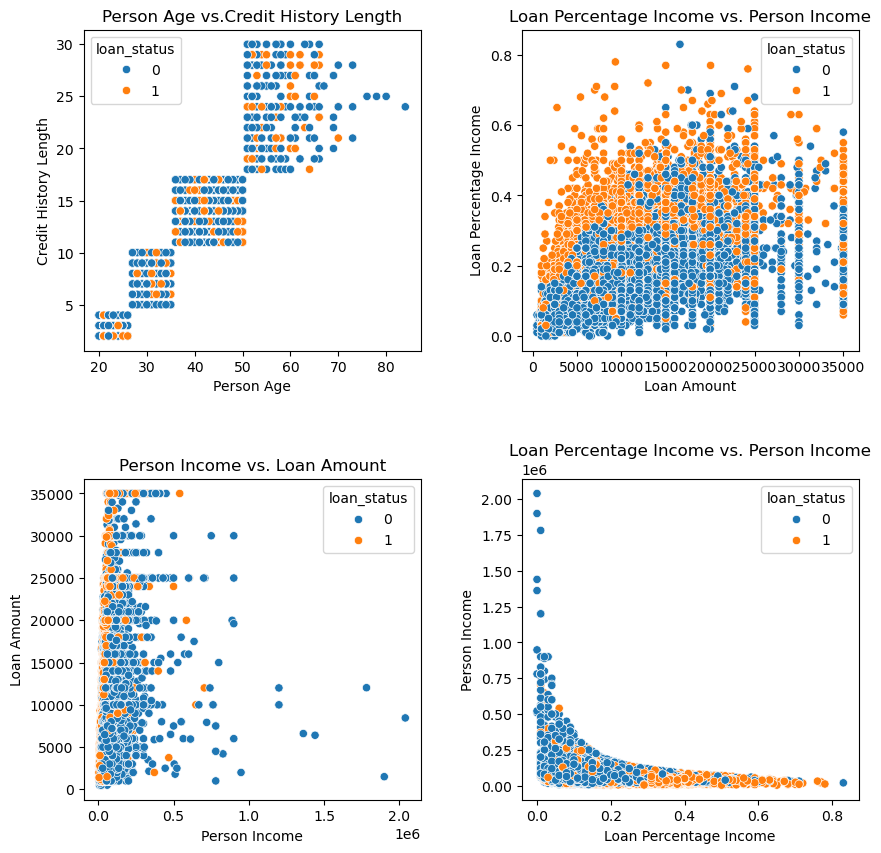

In [26]:
#Scatterplots for the correlating variables:

fig,axes =plt.subplots(2,2,figsize=(10,10))
x_labels=["Person Age","Loan Amount", "Person Income", "Loan Percentage Income"]
y_labels=["Credit History Length","Loan Percentage Income", "Loan Amount", "Person Income"]
titles=["Person Age vs.Credit History Length","Loan Percentage Income vs. Person Income", "Person Income vs. Loan Amount","Loan Percentage Income vs. Person Income"]
ax=[axes[0,0],axes[0,1],axes[1,0],axes[1,1]]
x =["person_age","loan_amnt","person_income","loan_percent_income"]
y=["cb_person_cred_hist_length","loan_percent_income","loan_amnt","person_income"]

for i in range(len(x_labels)):
    sns.scatterplot(x=x[i],y = y[i],data=data, hue='loan_status',ax = ax[i])
    ax[i].set_title(titles[i])
    ax[i].set_xlabel(x_labels[i])
    ax[i].set_ylabel(y_labels[i])

plt.subplots_adjust(wspace=0.3 ,hspace=0.4)
plt.show()

### Observation:

* There is a strong positive dependence between Person_age and Person_cred_hist_length: the older individuals tend to have longer credit histories.
* The second and forth plots indicate that as "loan_percent_income" increases, the number of defaults tend to increase. This suggests that "loan_percent_income" is a strong predictor of loan default.
* The third plot shows that individuals with higher incomes tend to borrow less and have a lower risk of default. The individuals with lower incomes tend to borrow more and have a higher risk of default. This observation highlights the importance of considering income as a crucial factor in predicting loan default.

In [40]:
# Loan Status
home_loan_status = pd.crosstab(index=data['person_home_ownership'],columns = data.loan_status,margins=True )
home_loan_status.columns= ['Non Default %', 'Default %', 'Total']
home_loan_status['Non Default %'] = round(home_loan_status['Non Default %']/home_loan_status['Total'] * 100,2)
home_loan_status['Default %'] = round(home_loan_status['Default %']/home_loan_status['Total'] * 100,2)

home_ownership = data.groupby(['person_home_ownership','cb_person_default_on_file'])['loan_status'].sum().reset_index().sort_values(by='loan_status',ascending=False)
home_ownership['loan_status_percent'] = home_ownership['loan_status']/home_ownership['loan_status'].sum()
print("         Home ownership vs. Loan Status")
print(home_loan_status)
print("-----------------------------------------------------\n")

grade_loan_status = pd.crosstab(index=data['loan_grade'],columns = data.loan_status,margins=True )
grade_loan_status.columns= ['Non Default %', 'Default %', 'Total']
grade_loan_status['Non Default %'] = round(grade_loan_status['Non Default %']/grade_loan_status['Total'] * 100,2)
grade_loan_status['Default %'] = round(grade_loan_status['Default %']/grade_loan_status['Total'] * 100,2)

loan_grade = data.groupby(['loan_grade','cb_person_default_on_file'])['loan_status'].sum().reset_index().sort_values(by='loan_status',ascending=False)
loan_grade['loan_status_percent'] = loan_grade['loan_status']/loan_grade['loan_status'].sum()
print("         Loan Grade vs. Loan Status")
print(grade_loan_status)
print("-----------------------------------------------------\n")





         Home ownership vs. Loan Status
                       Non Default %  Default %  Total
person_home_ownership                                 
MORTGAGE                       87.50      12.50  13018
OTHER                          68.87      31.13    106
OWN                            93.06       6.94   2391
RENT                           68.88      31.12  16006
All                            78.40      21.60  31521
-----------------------------------------------------

         Loan Grade vs. Loan Status
            Non Default %  Default %  Total
loan_grade                                 
A                   90.44       9.56  10300
B                   84.03      15.97  10121
C                   79.68      20.32   6300
D                   41.22      58.78   3549
E                   35.75      64.25    951
F                   29.66      70.34    236
G                    1.56      98.44     64
All                 78.40      21.60  31521
--------------------------------------------

In [41]:
# Loan Intent vs Loan Status
intent_loan_status = grade_loan_status = pd.crosstab(index=data['loan_intent'],columns = data.loan_status,margins=True )
intent_loan_status.columns= ['Non Default %', 'Default %', 'Total']
intent_loan_status['Non Default %'] = round(intent_loan_status['Non Default %']/intent_loan_status['Total'] * 100,2)
intent_loan_status['Default %'] = round(intent_loan_status['Default %']/intent_loan_status['Total'] * 100,2)

loan_intent = data.groupby(['loan_intent','cb_person_default_on_file'])['loan_status'].sum().reset_index().sort_values(by='loan_status',ascending=False)
loan_intent['loan_status_percent'] = loan_intent['loan_status']/loan_intent['loan_status'].sum()
print("         Loan Intent vs. Loan Status")
print(intent_loan_status)
print("-----------------------------------------------------\n")

         Loan Intent vs. Loan Status
                   Non Default %  Default %  Total
loan_intent                                       
DEBTCONSOLIDATION          71.55      28.45   5044
EDUCATION                  83.01      16.99   6246
HOMEIMPROVEMENT            74.39      25.61   3499
MEDICAL                    73.40      26.60   5868
PERSONAL                   80.49      19.51   5346
VENTURE                    85.30      14.70   5518
All                        78.40      21.60  31521
-----------------------------------------------------



In [43]:
default_on_file_loan_status = grade_loan_status = pd.crosstab(index=data['cb_person_default_on_file'],columns = data.loan_status,margins=True )
default_on_file_loan_status.columns= ['Non Default %', 'Default %', 'Total']
default_on_file_loan_status['Non Default %'] = round(default_on_file_loan_status['Non Default %']/default_on_file_loan_status['Total'] * 100,2)
default_on_file_loan_status['Default %'] = round(default_on_file_loan_status['Default %']/default_on_file_loan_status['Total'] * 100,2)


print("        Historical default of the individual  vs. Loan Status")
print(default_on_file_loan_status)
print("-----------------------------------------------------\n")

        Historical default of the individual  vs. Loan Status
                           Non Default %  Default %  Total
cb_person_default_on_file                                 
N                                  81.88      18.12  25907
Y                                  62.38      37.62   5614
All                                78.40      21.60  31521
-----------------------------------------------------



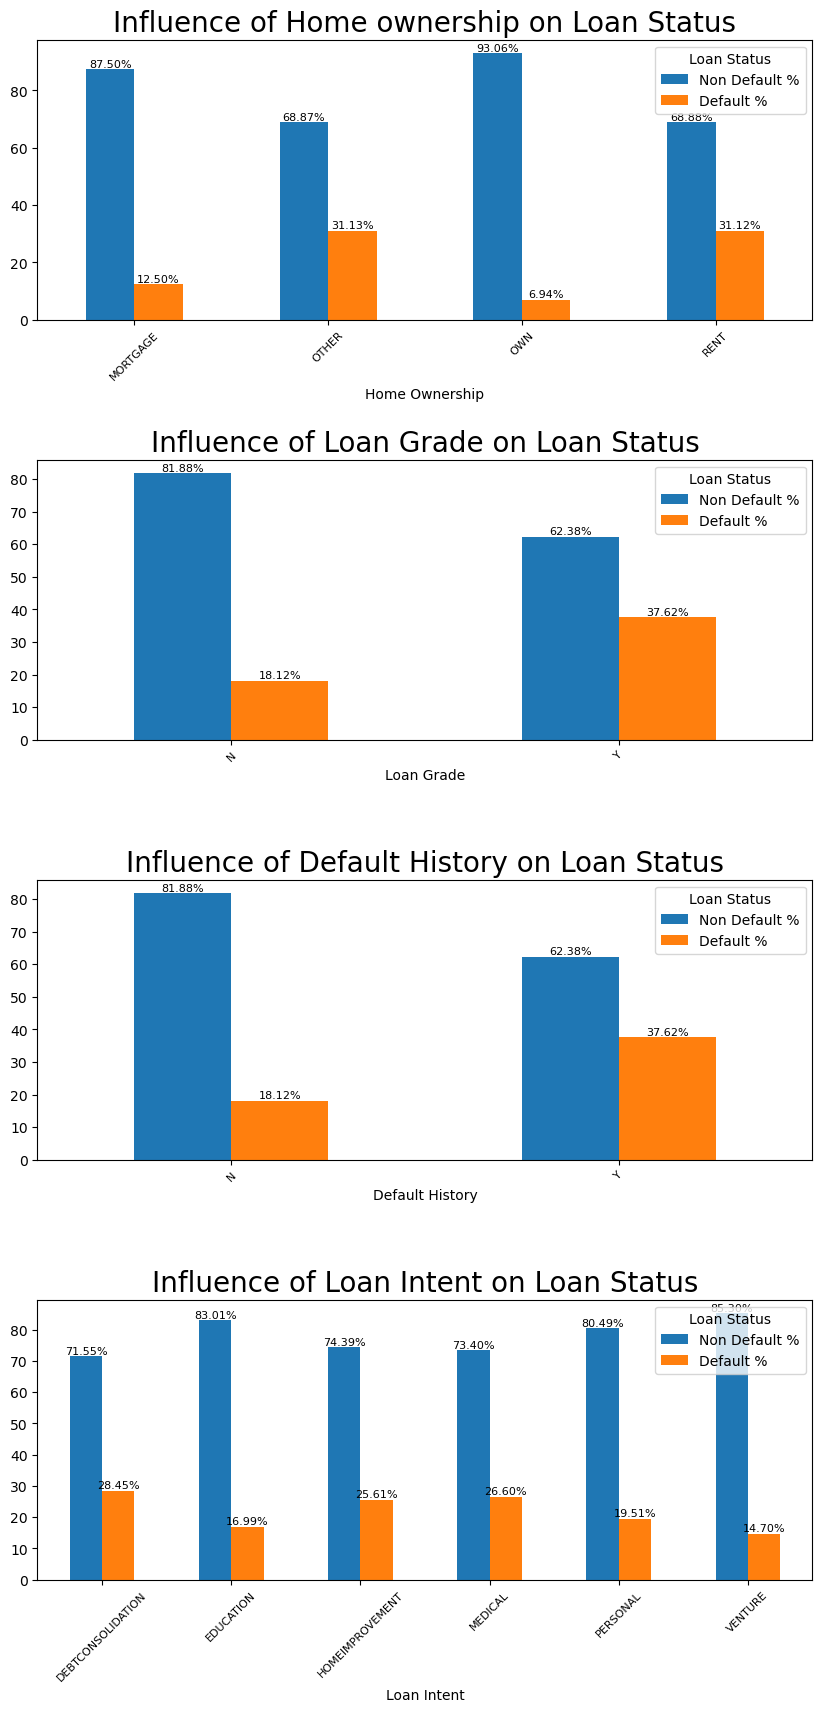

In [58]:
# Lets visualize above data

fig ,axes = plt.subplots(4, 1,figsize=(10,20))
x_labels=["Home Ownership","Loan Grade",  "Default History","Loan Intent"]
titles=["Influence of Home ownership on Loan Status","Influence of Loan Grade on Loan Status", "Influence of Default History on Loan Status","Influence of Loan Intent on Loan Status"]
x1 =[home_loan_status,grade_loan_status,default_on_file_loan_status, intent_loan_status]

for i in range(len(x_labels)):
    x1[i].iloc[:-1,0:2].plot.bar(ax=axes[i])
    axes[i].set_xlabel(x_labels[i],fontsize = 10)
    axes[i].set_title(titles[i],fontsize=20)
    axes[i].legend(title = 'Loan Status')
    for p in axes[i].patches:
        axes[i].text(p.get_x() + p.get_width()/2., p.get_height(), f"{p.get_height():.2f}%", ha='center', va='bottom',fontsize = 8)
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45, fontsize =8)
plt.subplots_adjust(wspace=0.3, hspace=0.5)
plt.show()

### Observation:

* The overall default rate for all individuals is 21.60%.
* Home owners (MORTGAGE, OWN) tend to have a lower loan default rate compared to renters (RENT) and those with other types of home ownership (OTHER). These findings can suggest that owning a home or having a mortgage might be associated with a lower risk of loan default compared to renting or having other types of home ownership.
* Loans with a grade A have the highest non-default rate (90.44%) and the lowest default rate (9.56%). Loans with a grade F have the lowest non-default rate (29.66%) and the highest default rate (70.34%). As you move from higher-grade loans (A, B, C) to lower-grade loans (D, E, F), the non-default rate decreases, while the default rate increases. It can mean, that higher-grade loans are less likely to default, while lower-grade loans are more likely to default.
* Individuals who already has default history have a higher default rate of 37.62%, compared to those who doesn't have (18.12%). It can mean that individuals with positive default history may be more likely to default on their loans.
* The loan intent categories with the highest proportion of loans that are in default are DEBTCONSOLIDATION (28.45%), HOMEIMPROVEMENT(25.61%) and MEDICAL (26.60%). They have a higher risk of default, while loans for education (EDUCATION) and venture purposes (VENTURE) have a lower risk of default (16.99% and 14.70%, respectively).

In [24]:
# Percentage
# Create new categories to reduce the impact outliers
# Create age categories
bins = [-1, 20 ,30, 40, 50 ,60 ,70, 1000]
labels = ["0-20","20-30","30-40","40-50","50-60","60-70","70+"]
data["age_cat"] = pd.cut(data['person_age'],bins= bins, labels=labels)
age_cat = data['age_cat'].value_counts().reset_index()
print(age_cat.set_index("age_cat"))
print("----------------------------------------------------\n")


# Create Person_emp_length Categories
bins = [-1, 5 , 10, 15 ,1000]
labels = ["0-5","5-10","10-15","15+"]

data["emp_length_cat"] = pd.cut(data['person_emp_length'],bins = bins , labels=labels)
emp_length_cat = data["emp_length_cat"].value_counts().reset_index()
print(emp_length_cat.set_index('emp_length_cat'))
print("----------------------------------------------------\n")

# Create person_income Categoris
bins = [0, 25000, 50000, 75000, 100000, 500000]
labels = ["0-25000","25000-50000","50000-75000","75000-100000","100000+"]
data['person_income_cat'] = pd.cut(data['person_income'],bins = bins , labels= labels)
person_income_cat = data['person_income_cat'].value_counts().reset_index()
print(person_income_cat.set_index("person_income_cat"))
print("----------------------------------------------------\n")

# Create loan amount catogories
bins = [0 ,5000,10000, 15000,20000,100000]
labels =["0-5000","5000-10000","10000-15000","15000- 20000","20000+"]
data['loan_amount_cat'] = pd.cut(data['loan_amnt'],bins = bins , labels=labels)
loan_amount_cat = data['loan_amount_cat'].value_counts().reset_index()
print(loan_amount_cat.set_index('loan_amount_cat'))
print("----------------------------------------------------\n")



         count
age_cat       
20-30    23966
30-40     6089
40-50     1173
50-60      215
60-70       56
0-20        15
70+          7
----------------------------------------------------

                count
emp_length_cat       
0-5             20042
5-10             8564
10-15            2303
15+               612
----------------------------------------------------

                   count
person_income_cat       
25000-50000        11177
50000-75000         9405
75000-100000        4593
100000+             4097
0-25000             2199
----------------------------------------------------

                 count
loan_amount_cat       
5000-10000       11656
0-5000            9023
10000-15000       5989
15000- 20000      2751
20000+            2102
----------------------------------------------------



In [25]:
# Create hist_length_category categories
bins = [0 ,5, 10, 15, 100]
labels = ["0-5","5-10","10-15","15+"]
data["cb_person_cred_hist_length_cat"] = pd.cut(data['cb_person_cred_hist_length'], bins =bins ,labels=labels)
cb_person_cred_hist_length_cat = data['cb_person_cred_hist_length_cat'].value_counts().reset_index()
print(cb_person_cred_hist_length_cat.set_index('cb_person_cred_hist_length_cat'))
print("----------------------------------------------------\n")

                                count
cb_person_cred_hist_length_cat       
0-5                             19026
5-10                             9129
10-15                            2255
15+                              1111
----------------------------------------------------



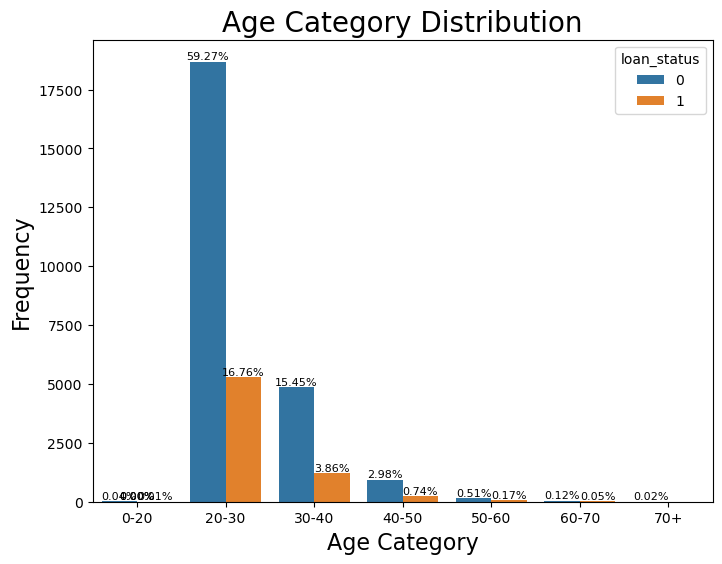

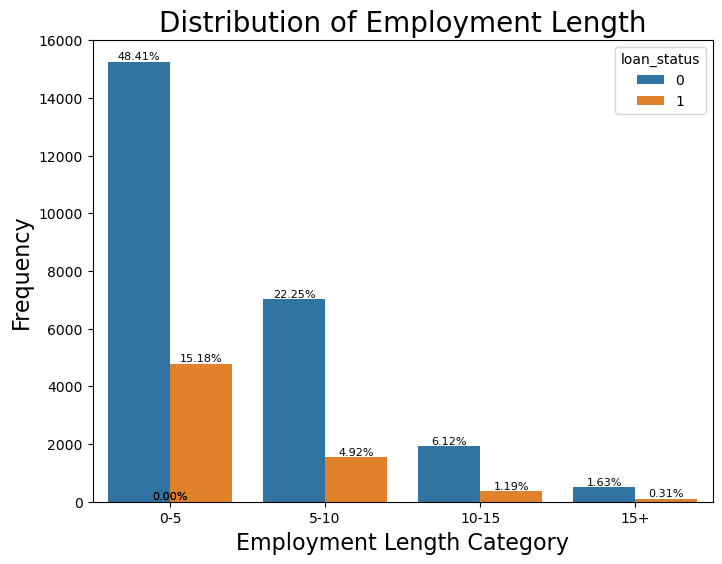

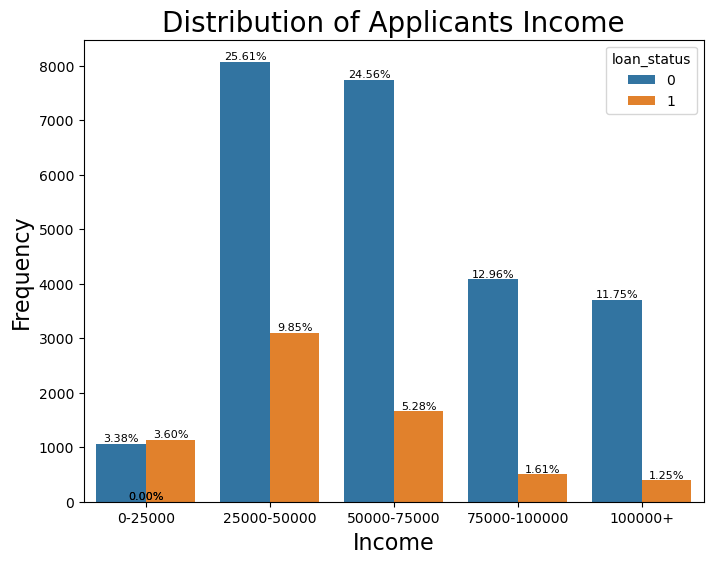

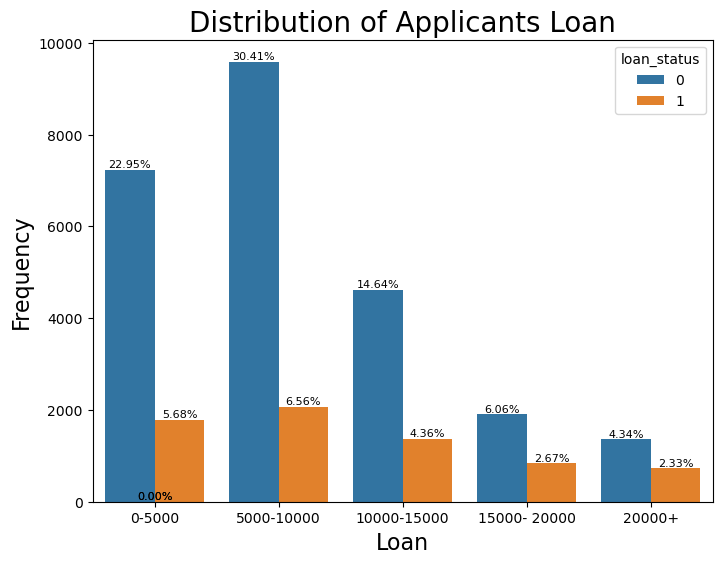

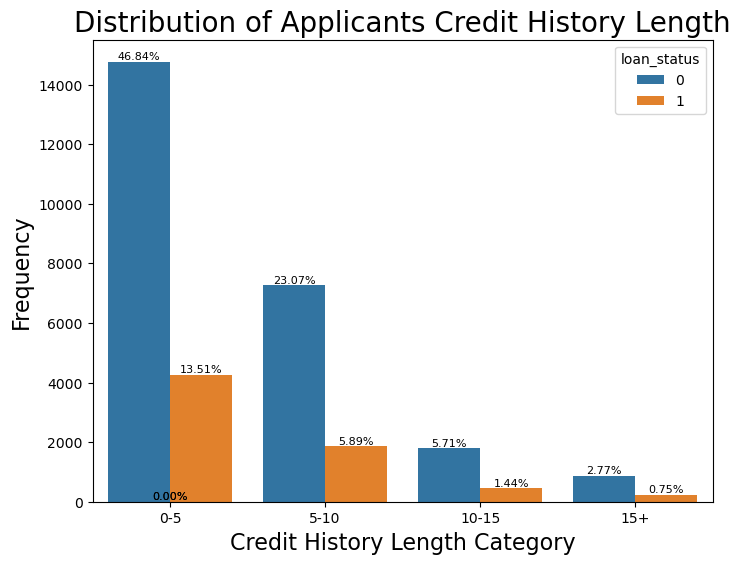

In [59]:
# Lets Visualize above data

x =["age_cat","emp_length_cat","person_income_cat","loan_amount_cat","cb_person_cred_hist_length_cat"]
titles =["Age Category Distribution","Distribution of Employment Length","Distribution of Applicants Income","Distribution of Applicants Loan","Distribution of Applicants Credit History Length"]
x_labels = ["Age Category",'Employment Length Category',"Income","Loan","Credit History Length Category"]

for i in range(len(x)):
    fig = plt.figure(figsize = (8,6))
    ax = plt.subplot()
    sns.countplot(x =x[i],data = data ,hue ='loan_status',ax = ax)
    plt.title(titles[i],fontsize =20)
    plt.xlabel(x_labels[i],fontsize =16)
    plt.ylabel("Frequency",fontsize =16)
    total_count = data.shape[0]
    for p in ax.patches:
        height = p.get_height()
        per = height/total_count
        ax.text(p.get_x() + p.get_width()/2. , height+1 , f"{per * 100:.2f}%",ha = 'center',va='bottom', fontsize = 8)
    


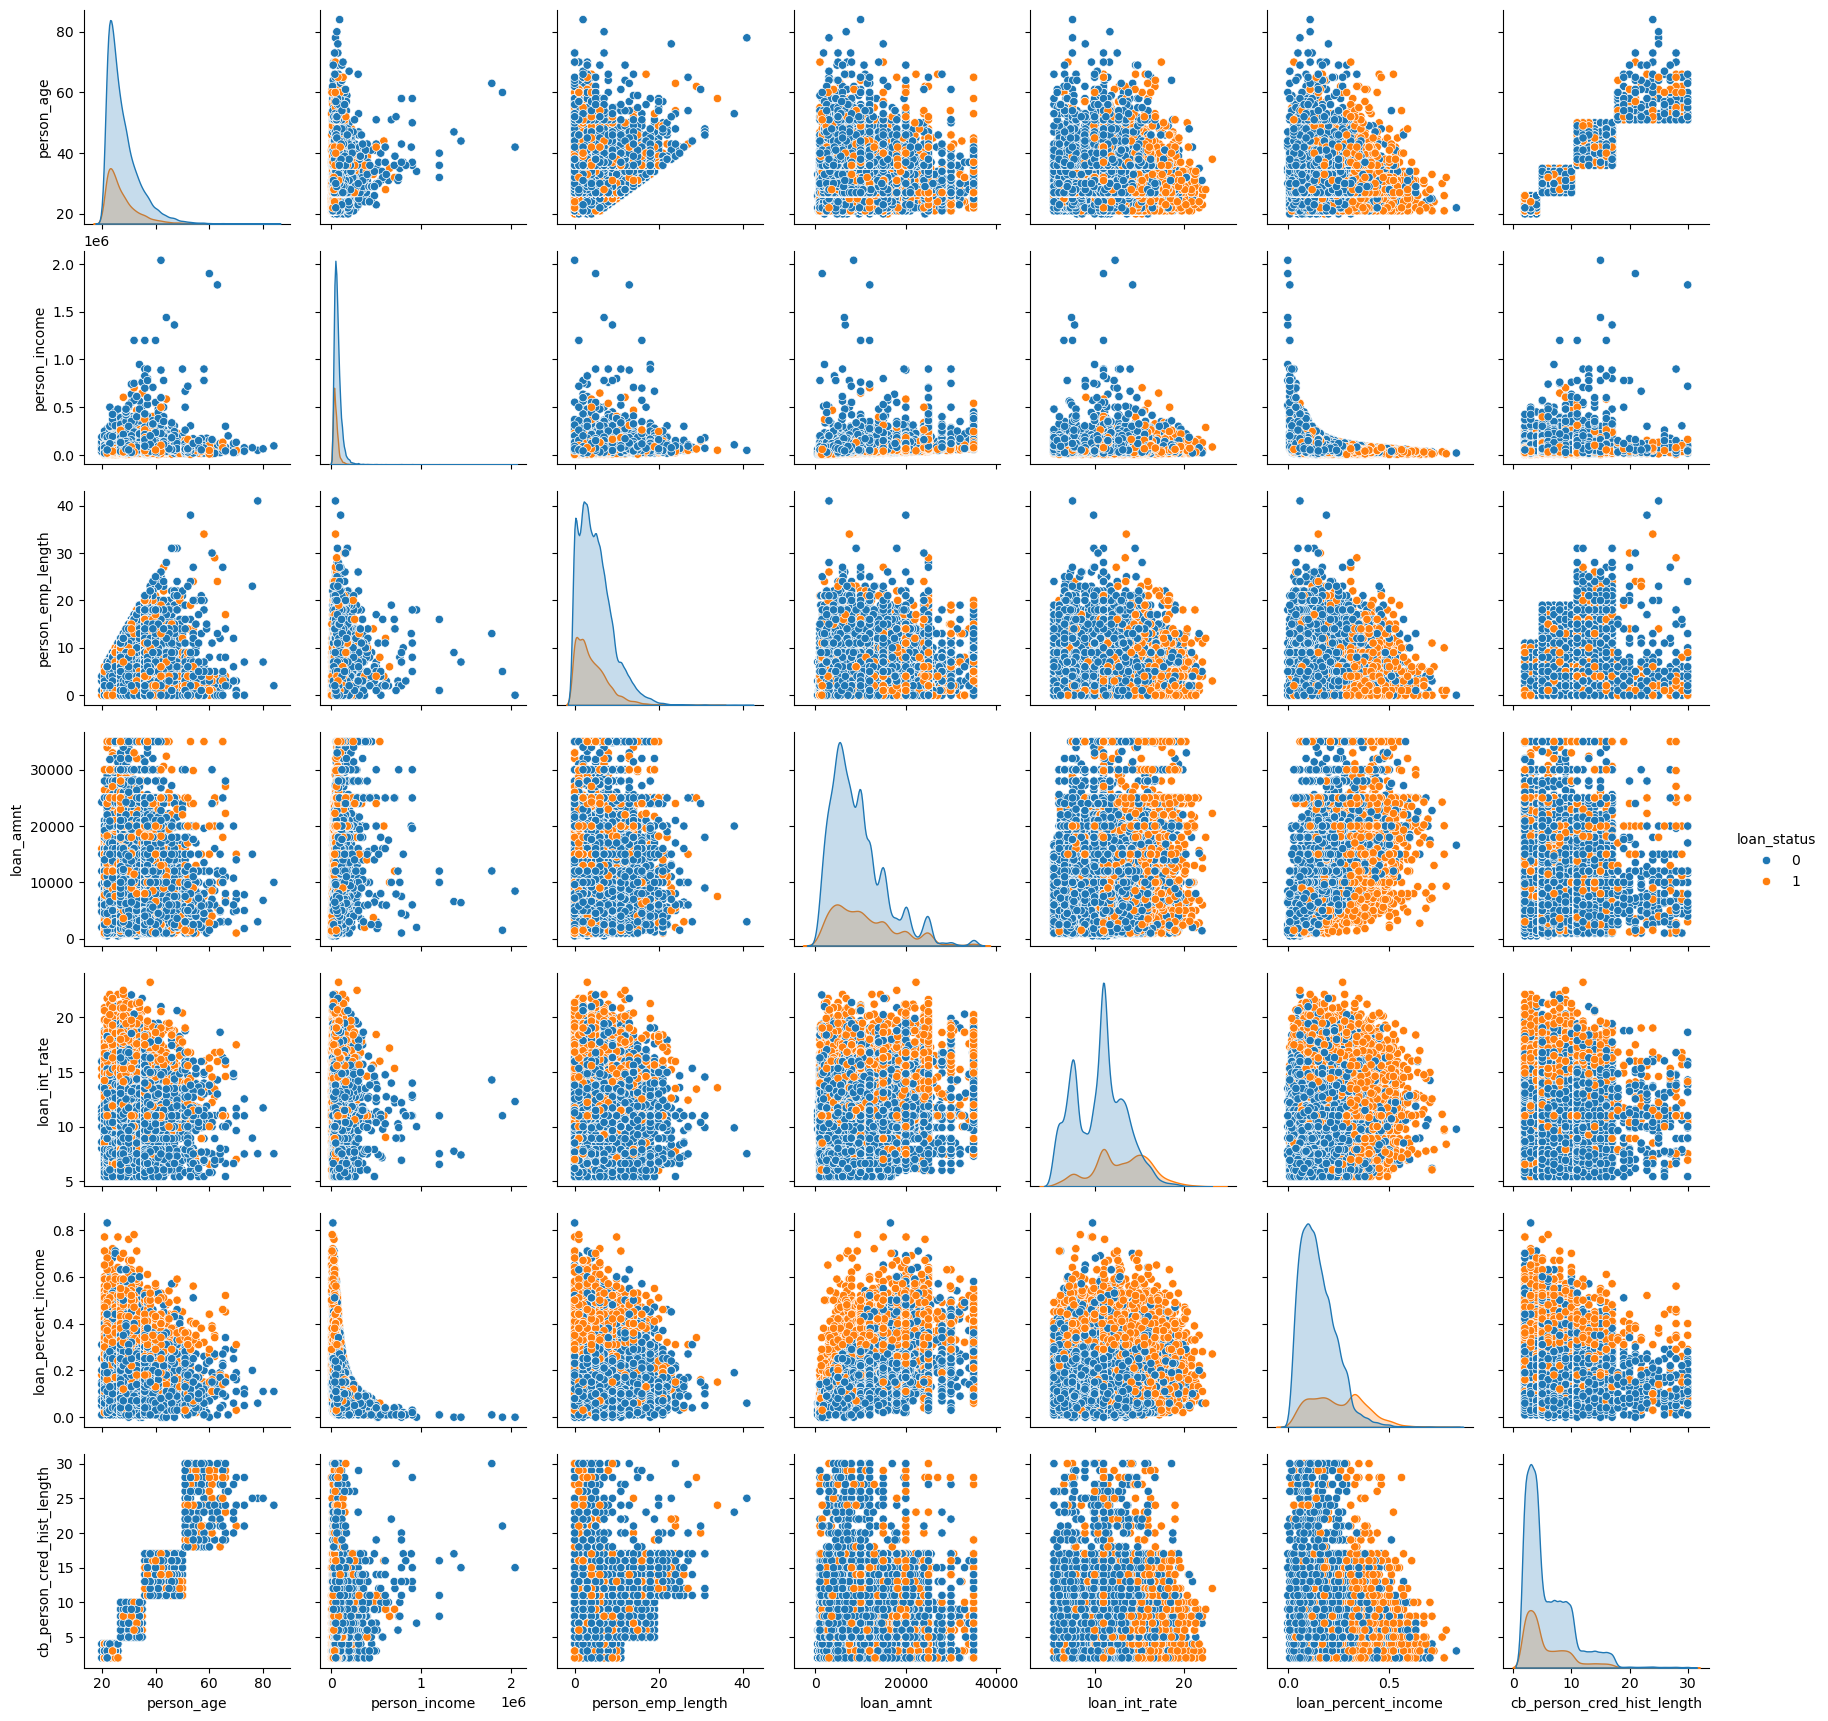

In [40]:
# General Look at all plots
sns.pairplot(data , hue = 'loan_status')

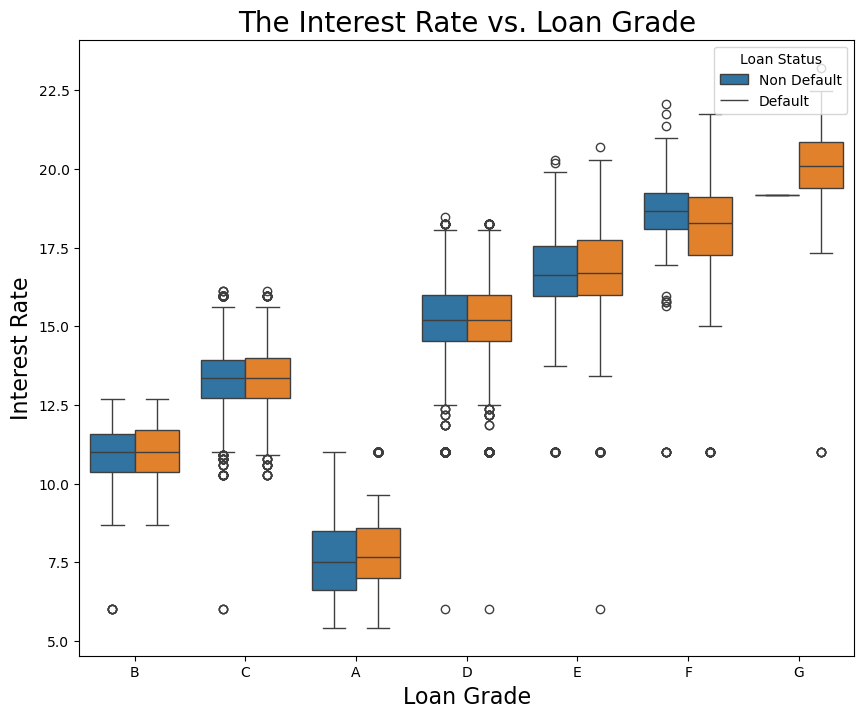

In [61]:
# Additional Plots

plt.figure(figsize=(10,8))
sns.boxplot(data=data , x = 'loan_grade',y = 'loan_int_rate',hue ='loan_status')
plt.title("The Interest Rate vs. Loan Grade", fontsize =20)
plt.xlabel('Loan Grade',fontsize =16)
plt.ylabel('Interest Rate', fontsize =16)
plt.legend(title = "Loan Status",loc = 'upper right', labels =["Non Default", "Default"])
plt.show()

### Observation:

* There is clear relationship between Loan grade and Loan interest rate , Loans with lower grades tends to have higher interest rates , while loans with higher grades(less risky) tend to have lower interest rates.

### Feature Engineering